***Imports***

In [1]:
import os
import numpy as np
import pandas as pd
import tqdm
import pickle
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors

In [2]:
data = pd.read_csv('archive (1)/styles.csv', error_bad_lines=False)
data.shape

C:\Users\laksh\AppData\Local\Temp\ipykernel_18692\1493496292.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('archive (1)/styles.csv', error_bad_lines=False)
Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, saw 11
Skipping 

(44424, 10)

In [3]:
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [4]:
data.fillna('',inplace=True)

In [5]:
data.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

In [6]:
df = data.copy()

***Making Tags***

In [7]:
data['gender'] = data['gender'].apply(lambda x:[x])

data['masterCategory'] = data['masterCategory'].apply(lambda x:[x])
data['masterCategory'] = data['masterCategory'].apply(lambda x:[i.replace(' ','') for i in x])

data['subCategory'] = data['subCategory'].apply(lambda x:[x])
data['subCategory'] = data['subCategory'].apply(lambda x:[i.replace(' ','') for i in x])

data['articleType'] = data['articleType'].apply(lambda x:[x])
data['articleType'] = data['articleType'].apply(lambda x:[i.replace(' ','') for i in x])

data['baseColour'] = data['baseColour'].apply(lambda x:[x])
data['baseColour'] = data['baseColour'].apply(lambda x:[i.replace(' ','') for i in x])

data['season'] = data['season'].apply(lambda x:[x])
data['season'] = data['season'].apply(lambda x:[i.replace(' ','') for i in x])

data['usage'] = data['usage'].apply(lambda x:[x])
data['usage'] = data['usage'].apply(lambda x:[i.replace(' ','') for i in x])

data['productDisplayName'] = data['productDisplayName'].apply(lambda x:x.split())

In [8]:
data['tags'] = data['gender']+data['masterCategory']+data['subCategory']+data['articleType']+data['baseColour']+data['season']+data['productDisplayName']

In [9]:
df['tags'] = data['tags']

In [10]:
del data

In [11]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,tags
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,"[Men, Apparel, Topwear, Shirts, NavyBlue, Fall..."
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,"[Men, Apparel, Bottomwear, Jeans, Blue, Summer..."
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,"[Women, Accessories, Watches, Watches, Silver,..."
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,"[Men, Apparel, Bottomwear, TrackPants, Black, ..."
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,"[Men, Apparel, Topwear, Tshirts, Grey, Summer,..."


In [12]:
df['tags'] = df['tags'].apply(lambda x:" ".join(x))
df['tags'] = df['tags'].apply(lambda x:x.lower())

***Steaming using port stamer***

In [13]:
ps =  PorterStemmer()

def do_steaming(obj):
  val=[]
  for i in obj:
    val.append(ps.stem(i))
  return "".join(val)

In [14]:
df['tags'] = df['tags'].apply(do_steaming)

***Count Vectorisation***

In [15]:
cv = CountVectorizer(max_features=1000,stop_words='english')
vectors = cv.fit_transform(df['tags']).toarray()

***saving vectors and df***

In [17]:
pickle.dump(vectors,open('vectors.pkl','wb'))
pickle.dump(df.to_dict(),open('df.pkl','wb'))

***Using neigrest neighbour to find 10 similar products regarding selected product***

In [18]:
neighbors = NearestNeighbors(n_neighbors=10,algorithm='brute',metric='euclidean')
neighbors.fit(vectors)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=10)

In [19]:
def index_of_product(id):
  res=[]
  index = df[df['id']==id].index[0]
  dis,idx = neighbors.kneighbors([vectors[index]])
  for i in idx[0]:
    res.append(df['id'][i])
  return res

In [20]:
similar_product_indexes = index_of_product(40000)

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import time

[39995, 40001, 40005, 40004, 40000, 40013, 39997, 40010, 30662, 30661]


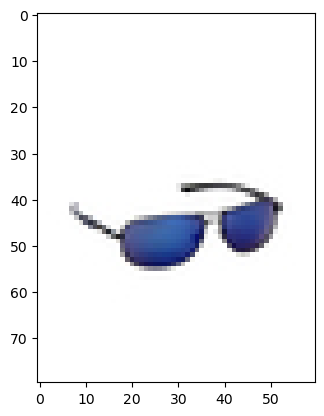

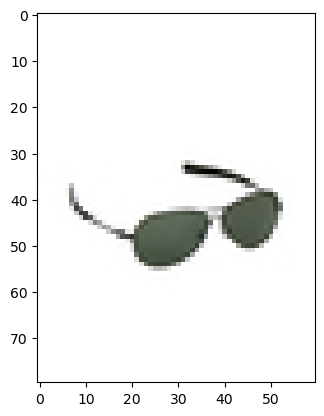

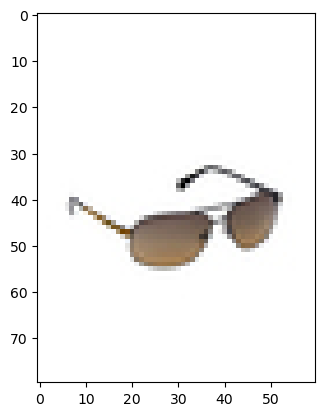

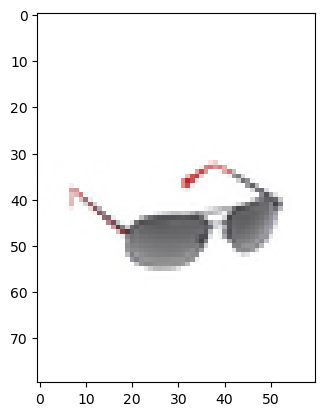

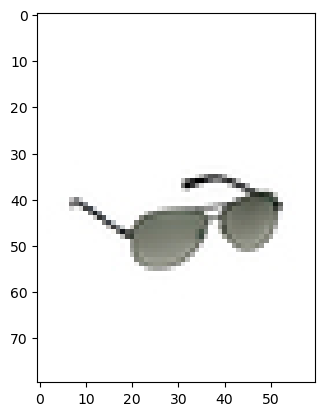

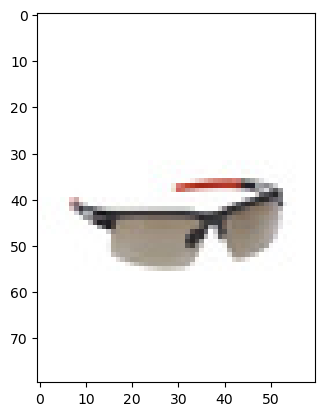

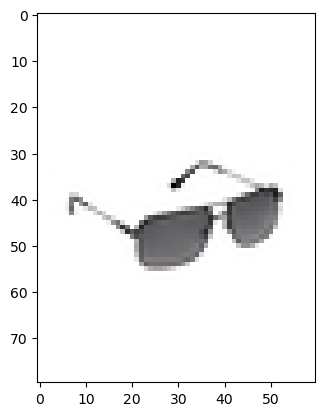

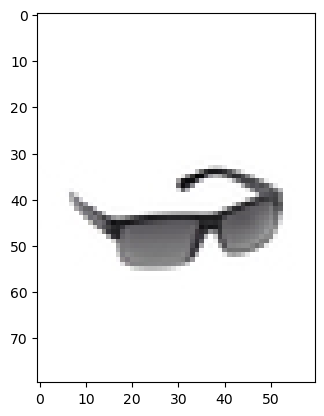

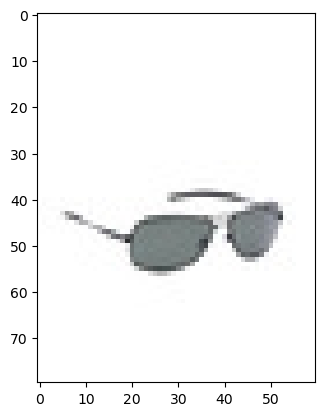

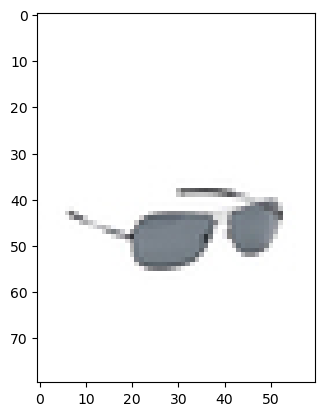

In [22]:
print(similar_product_indexes)
for id in similar_product_indexes:
    img = Image.open(f"archive (1)/images/{id}.jpg")
    img = np.array(img)
    plt.imshow(img)
    plt.show()
    # time.sleep(3)